In [1]:
import pandas as pd
import numpy as np
#estandarizacion de variables
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
#graficas
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px
from pylab import rcParams

#k means, cluster de periodos
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
#modelo
from tensorflow.keras.layers import Dense, SimpleRNN
import math
import itertools

In [2]:
df = pd.read_excel("PBI.xlsx")
df

Unnamed: 0  Consumo privado  Consumo público  \
0      1993-01           152148            28507   
1      1993-04           166026            32816   
2      1993-07           166668            33440   
3      1993-10           169860            33048   
4      1994-01           164965            29309   
..         ...              ...              ...   
107    2019-10           450453            99383   
108    2020-01           471875            90957   
109    2020-04           415986            88041   
110    2020-07           408462            90647   
111    2020-10           413952            96832   

     Exportaciones FOB (bienes y servicios reales)  \
0                                            15396   
1                                            17483   
2                                            16427   
3                                            16058   
4                                            16281   
..                                             ...   
107                                         172100   
108                                         137243   
109                                         136695   
110                                         136420   
111                                         116156   

     Formación bruta de capital fijo  Variación de existencias (3)  \
0                              37325                             0   
1                              43956                             0   
2                              48221                             0   
3                              50776                             0   
4                              45580                             0   
..                               ...                           ...   
107                           110590                         12945   
108                            93562                        -20185   
109                            76225                         -5772   
110                           115500                          2524   
111                           128203                         30248   

     Discrepancia estadística (4)  \
0                            3083   
1                            1549   
2                            1006   
3                             338   
4                            3935   
..                            ...   
107                        -20040   
108                          -719   
109                         15272   
110                          -930   
111                          6196   

     Importaciones FOB (bienes y servicios reales)  Producto Interno Bruto  
0                                            20089                  216370  
1                                            19958                  241872  
2                                            23116                  242646  
3                                            24947                  245132  
4                                            27125                  232945  
..                                             ...                     ...  
107                                         152098                  672442  
108                                         141762                  630971  
109                                         118578                  607869  
110                                         137828                  614795  
111                                         147876                  643710  

[112 rows x 9 columns]

## PREPROCESAMIENTO

Cambio el nombre de la columna "unnamed" por Año

In [3]:
df.rename(columns = {"Unnamed: 0" : "Año/Trimestre"}, inplace=True)
df.columns

Index(['Año/Trimestre', 'Consumo privado', 'Consumo público',
       'Exportaciones FOB (bienes y servicios reales)',
       'Formación bruta de capital fijo', 'Variación de existencias (3)',
       'Discrepancia estadística (4)',
       'Importaciones FOB (bienes y servicios reales)',
       'Producto Interno Bruto'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Año/Trimestre                                  112 non-null    object
 1   Consumo privado                                112 non-null    int64 
 2   Consumo público                                112 non-null    int64 
 3   Exportaciones FOB (bienes y servicios reales)  112 non-null    int64 
 4   Formación bruta de capital fijo                112 non-null    int64 
 5   Variación de existencias (3)                   112 non-null    int64 
 6   Discrepancia estadística (4)                   112 non-null    int64 
 7   Importaciones FOB (bienes y servicios reales)  112 non-null    int64 
 8   Producto Interno Bruto                         112 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 8.0+ KB


In [5]:
df.shape

(112, 9)

In [6]:
df["Año/Trimestre"] =  pd.to_datetime(df["Año/Trimestre"])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   Año/Trimestre                                  112 non-null    datetime64[ns]
 1   Consumo privado                                112 non-null    int64         
 2   Consumo público                                112 non-null    int64         
 3   Exportaciones FOB (bienes y servicios reales)  112 non-null    int64         
 4   Formación bruta de capital fijo                112 non-null    int64         
 5   Variación de existencias (3)                   112 non-null    int64         
 6   Discrepancia estadística (4)                   112 non-null    int64         
 7   Importaciones FOB (bienes y servicios reales)  112 non-null    int64         
 8   Producto Interno Bruto                         112 non-null  

In [8]:
df.describe()

Consumo privado  Consumo público  \
count       112.000000       112.000000   
mean     348234.017857     62722.133929   
std      149401.260069     26050.936675   
min      148507.000000     28422.000000   
25%      184885.500000     35631.000000   
50%      390162.500000     64399.000000   
75%      490631.500000     88234.000000   
max      582221.000000    105392.000000   

       Exportaciones FOB (bienes y servicios reales)  \
count                                     112.000000   
mean                                    98054.821429   
std                                     58367.249118   
min                                     15396.000000   
25%                                     30797.750000   
50%                                    128604.500000   
75%                                    146985.250000   
max                                    175584.000000   

       Formación bruta de capital fijo  Variación de existencias (3)  \
count                       112.000000                    112.000000   
mean                      94332.098214                   1876.964286   
std                       43140.753771                   9485.709254   
min                       22719.000000                 -20185.000000   
25%                       51394.000000                   -369.750000   
50%                       97686.000000                      0.000000   
75%                      134316.000000                   3923.000000   
max                      164572.000000                  31516.000000   

       Discrepancia estadística (4)  \
count                     112.00000   
mean                      701.06250   
std                      4226.88673   
min                    -20040.00000   
25%                         0.00000   
50%                         0.00000   
75%                      1070.25000   
max                     15272.00000   

       Importaciones FOB (bienes y servicios reales)  Producto Interno Bruto  
count                                     112.000000              112.000000  
mean                                   105532.383929           500379.607143  
std                                     70273.460447           203793.829345  
min                                     14028.000000           216370.000000  
25%                                     32531.500000           266615.500000  
50%                                    109365.000000           580110.500000  
75%                                    172202.000000           682032.000000  
max                                    229080.000000           791236.000000

In [9]:
import matplotlib.pyplot as plt
import pandas_profiling
pandas_profiling.ProfileReport(df) 

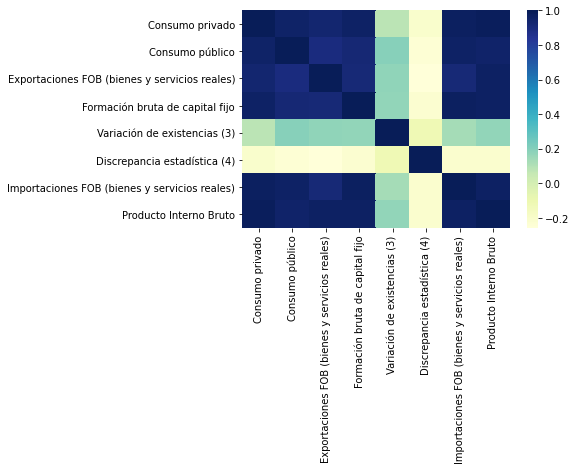

In [10]:
sns.heatmap(df[['Consumo privado', 'Consumo público',
       'Exportaciones FOB (bienes y servicios reales)',
       'Formación bruta de capital fijo', 'Variación de existencias (3)',
       'Discrepancia estadística (4)',
       'Importaciones FOB (bienes y servicios reales)',
       'Producto Interno Bruto']].corr(),cmap= "YlGnBu")

plt.savefig("Heatmap.png",format  ="png", dpi = 100, bbox_inches='tight')
plt.show()


In [11]:
df.drop(["Año/Trimestre"], axis=1).columns.values

array(['Consumo privado', 'Consumo público',
       'Exportaciones FOB (bienes y servicios reales)',
       'Formación bruta de capital fijo', 'Variación de existencias (3)',
       'Discrepancia estadística (4)',
       'Importaciones FOB (bienes y servicios reales)',
       'Producto Interno Bruto'], dtype=object)

Borro las columnas variacion de existencias y discrepancia estadistica ya que no tienen mucha correlacion con el PBI.

A partir de la matriz de correlaciones vemos que todas las variables presentan correlacion significativa con el valor de PBI.

In [12]:
eliminados = ["Variación de existencias (3)", "Discrepancia estadística (4)"]
df.drop(eliminados, axis=1, inplace=True)
df

Año/Trimestre  Consumo privado  Consumo público  \
0      1993-01-01           152148            28507   
1      1993-04-01           166026            32816   
2      1993-07-01           166668            33440   
3      1993-10-01           169860            33048   
4      1994-01-01           164965            29309   
..            ...              ...              ...   
107    2019-10-01           450453            99383   
108    2020-01-01           471875            90957   
109    2020-04-01           415986            88041   
110    2020-07-01           408462            90647   
111    2020-10-01           413952            96832   

     Exportaciones FOB (bienes y servicios reales)  \
0                                            15396   
1                                            17483   
2                                            16427   
3                                            16058   
4                                            16281   
..                                             ...   
107                                         172100   
108                                         137243   
109                                         136695   
110                                         136420   
111                                         116156   

     Formación bruta de capital fijo  \
0                              37325   
1                              43956   
2                              48221   
3                              50776   
4                              45580   
..                               ...   
107                           110590   
108                            93562   
109                            76225   
110                           115500   
111                           128203   

     Importaciones FOB (bienes y servicios reales)  Producto Interno Bruto  
0                                            20089                  216370  
1                                            19958                  241872  
2                                            23116                  242646  
3                                            24947                  245132  
4                                            27125                  232945  
..                                             ...                     ...  
107                                         152098                  672442  
108                                         141762                  630971  
109                                         118578                  607869  
110                                         137828                  614795  
111                                         147876                  643710  

[112 rows x 7 columns]

Estandarizacion de las variables

In [13]:
scaler = StandardScaler()
df_ = scaler.fit_transform(df.drop("Año/Trimestre", axis=1))
df_std = pd.DataFrame(df_, columns = ['Consumo privado', 'Consumo público',
       'Exportaciones FOB (bienes y servicios reales)',
       'Formación bruta de capital fijo',
       'Importaciones FOB (bienes y servicios reales)',
       'Producto Interno Bruto'])
df_std

Consumo privado  Consumo público  \
0          -1.318378        -1.319297   
1          -1.225070        -1.153146   
2          -1.220753        -1.129086   
3          -1.199292        -1.144201   
4          -1.232203        -1.288372   
..               ...              ...   
107         0.687266         1.413601   
108         0.831296         1.088704   
109         0.455528         0.976267   
110         0.404941         1.076751   
111         0.441853         1.315238   

     Exportaciones FOB (bienes y servicios reales)  \
0                                        -1.422550   
1                                        -1.386633   
2                                        -1.404806   
3                                        -1.411157   
4                                        -1.407319   
..                                             ...   
107                                       1.274310   
108                                       0.674425   
109                                       0.664994   
110                                       0.660261   
111                                       0.311519   

     Formación bruta de capital fijo  \
0                          -1.327360   
1                          -1.172963   
2                          -1.073656   
3                          -1.014165   
4                          -1.135150   
..                               ...   
107                         0.378551   
108                        -0.017931   
109                        -0.421608   
110                         0.492876   
111                         0.788654   

     Importaciones FOB (bienes y servicios reales)  Producto Interno Bruto  
0                                        -1.221334               -1.399876  
1                                        -1.223207               -1.274177  
2                                        -1.178066               -1.270362  
3                                        -1.151894               -1.258109  
4                                        -1.120761               -1.318178  
..                                             ...                     ...  
107                                       0.665613                0.848091  
108                                       0.517869                0.643682  
109                                       0.186475                0.529812  
110                                       0.461636                0.563950  
111                                       0.605263                0.706472  

[112 rows x 6 columns]

In [14]:
df.drop("Año/Trimestre", axis=1).columns

Index(['Consumo privado', 'Consumo público',
       'Exportaciones FOB (bienes y servicios reales)',
       'Formación bruta de capital fijo',
       'Importaciones FOB (bienes y servicios reales)',
       'Producto Interno Bruto'],
      dtype='object')

In [15]:
df_std.insert(0, "Año/Trimestre", df["Año/Trimestre"].values, allow_duplicates = False)
df_std

Año/Trimestre  Consumo privado  Consumo público  \
0      1993-01-01        -1.318378        -1.319297   
1      1993-04-01        -1.225070        -1.153146   
2      1993-07-01        -1.220753        -1.129086   
3      1993-10-01        -1.199292        -1.144201   
4      1994-01-01        -1.232203        -1.288372   
..            ...              ...              ...   
107    2019-10-01         0.687266         1.413601   
108    2020-01-01         0.831296         1.088704   
109    2020-04-01         0.455528         0.976267   
110    2020-07-01         0.404941         1.076751   
111    2020-10-01         0.441853         1.315238   

     Exportaciones FOB (bienes y servicios reales)  \
0                                        -1.422550   
1                                        -1.386633   
2                                        -1.404806   
3                                        -1.411157   
4                                        -1.407319   
..                                             ...   
107                                       1.274310   
108                                       0.674425   
109                                       0.664994   
110                                       0.660261   
111                                       0.311519   

     Formación bruta de capital fijo  \
0                          -1.327360   
1                          -1.172963   
2                          -1.073656   
3                          -1.014165   
4                          -1.135150   
..                               ...   
107                         0.378551   
108                        -0.017931   
109                        -0.421608   
110                         0.492876   
111                         0.788654   

     Importaciones FOB (bienes y servicios reales)  Producto Interno Bruto  
0                                        -1.221334               -1.399876  
1                                        -1.223207               -1.274177  
2                                        -1.178066               -1.270362  
3                                        -1.151894               -1.258109  
4                                        -1.120761               -1.318178  
..                                             ...                     ...  
107                                       0.665613                0.848091  
108                                       0.517869                0.643682  
109                                       0.186475                0.529812  
110                                       0.461636                0.563950  
111                                       0.605263                0.706472  

[112 rows x 7 columns]

# EDA

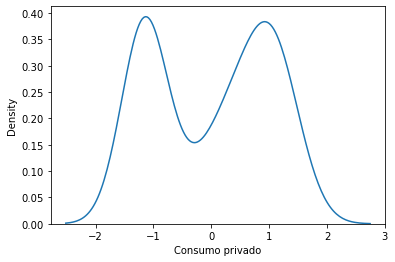

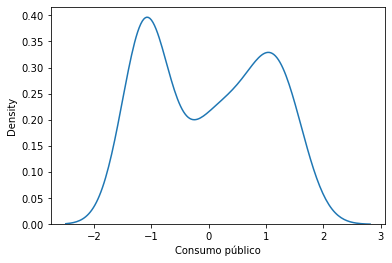

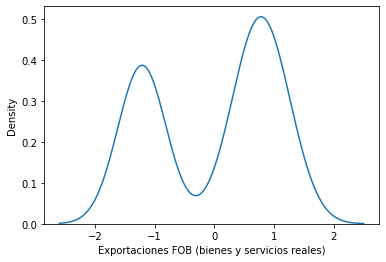

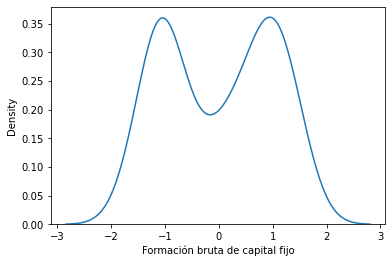

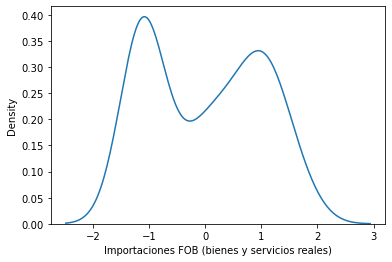

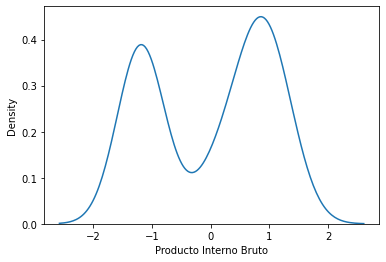

In [16]:
for i in df_std.columns[1:]:
    sns.kdeplot(df_std[i]) #como el histograma pero con densidad
    plt.show()

C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


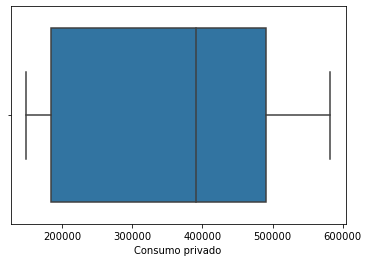

C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


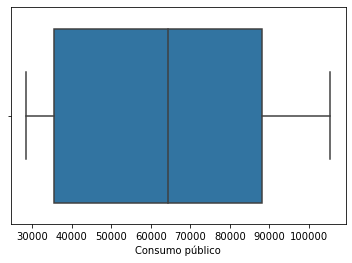

C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


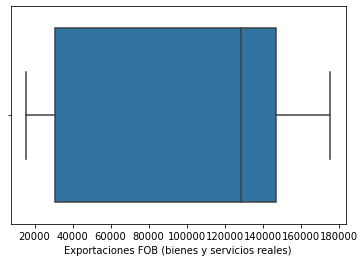

C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


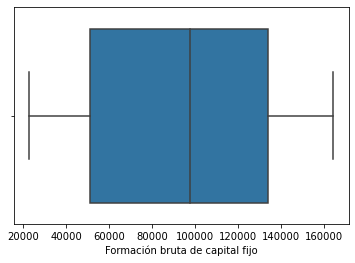

C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


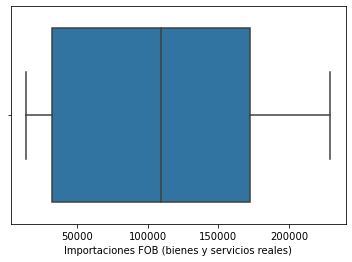

C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


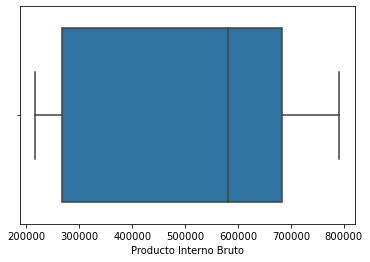

In [17]:
for i in df.columns[1:]:
    sns.boxplot(df[i]) #como el histograma pero con densidad
    plt.show()

Numero de columnas = 7


    'Año/Trimestre': Año y trimestre al cual pertenecen los datos, 

    'Consumo privado': consumo de bienes y servicios de agentes privados, 

    'Consumo público': consumo de bienes y servicios por parte del Estado,

    'Exportaciones FOB (bienes y servicios reales)': exportacion de bienes y servicios reales producidos en Argentina.,

    'Formación bruta de capital fijo': inversion extranjera directa,

    'Importaciones FOB (bienes y servicios reales)': importacion de bienes y servicios extranjeros reales,

    'Producto Interno Bruto': ingreso nacional.-



In [18]:
df_std.columns

Index(['Año/Trimestre', 'Consumo privado', 'Consumo público',
       'Exportaciones FOB (bienes y servicios reales)',
       'Formación bruta de capital fijo',
       'Importaciones FOB (bienes y servicios reales)',
       'Producto Interno Bruto'],
      dtype='object')

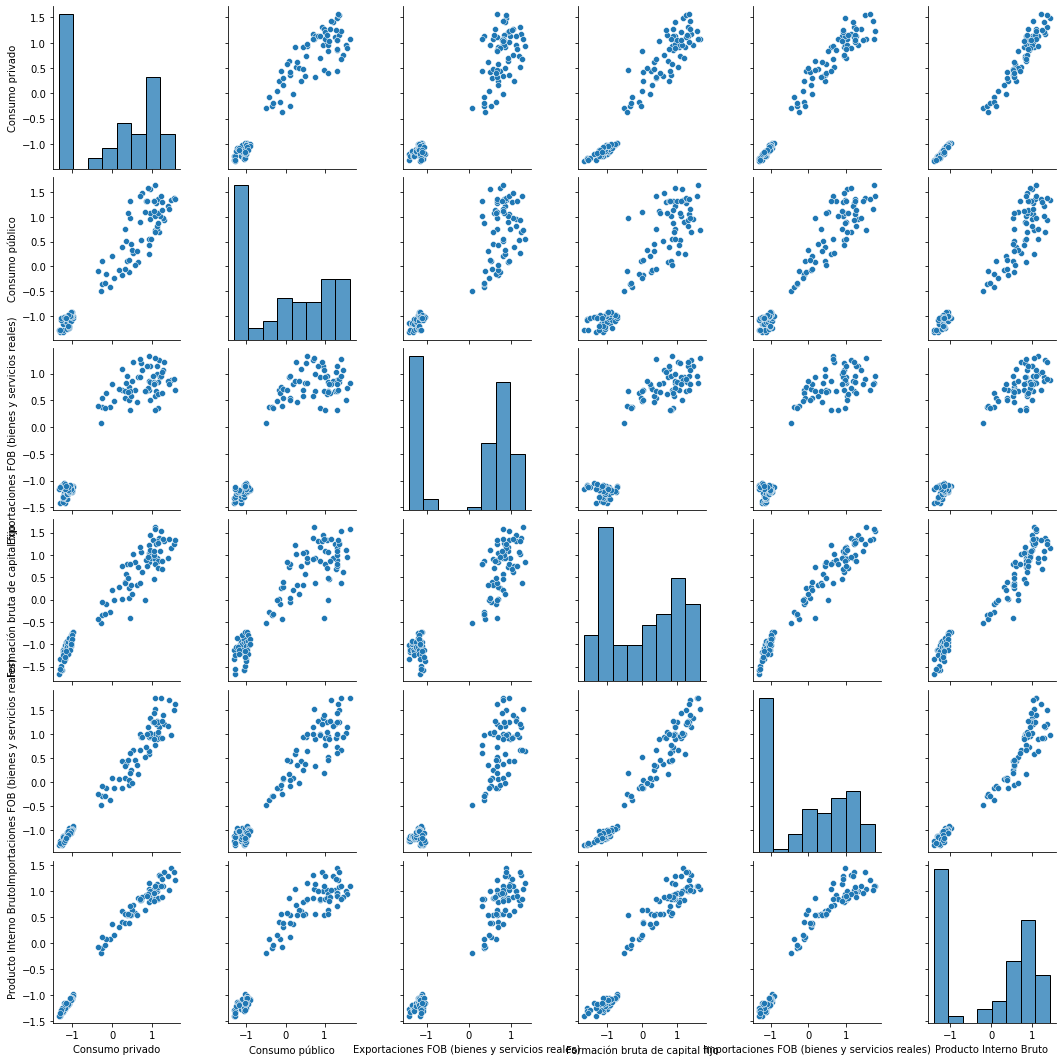

In [19]:
sns.pairplot(df_std)
plt.savefig("Pairplot.png",format  ="png", dpi = 100, bbox_inches='tight')

    Graficamente podemos ver que todas las variables son lineales al PBI, es decir, si el consumo (privado o publico), las importacione, exportaciones y etcetera aumentan el PBI tambien lo hará.

<ipython-input-20-7b060bcbbed2>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels)


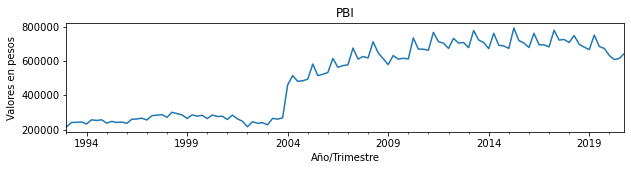

In [20]:
fig, ax1 = plt.subplots(figsize=(10,2))
serie = df["Producto Interno Bruto"].astype("int64")
serie.index=df["Año/Trimestre"]
labels =serie.index
ax1.set_title("PBI") #titulo
ax1.set_xlabel('Años') #nombre del eje x
ax1.set_ylabel('Valores en pesos') #nombre del eje y
ax1.set_xticklabels(labels)
serie.plot()
plt.savefig("SERIE.png",format  ="png", dpi = 100, bbox_inches='tight')
plt.show()

Observamos que a partir del año 2004 hay un salto el el PBI.


Como los datos comprendidos entre este salto se comportan de una manera muy diferente veremos si podemos agrupar los años de 1993 a 2004 por un lado y los años 2004 a 2020 por otro. Para esto utilizaremos el algoritmo k means ya que es perfecto para este tipo de datos.

## K MEANS con 2 clusters

In [21]:
X = df_std.drop(["Año/Trimestre"], axis=1).values

In [22]:
inercias = [] 
  
for k in range(1,20): 
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)     
    inercias.append(kmeans.inertia_) 
inercias


[671.9999999999995,
 100.62118482477723,
 41.15977436956647,
 31.33301347654686,
 25.777744424891136,
 22.33988755182172,
 19.96305434736922,
 17.808393244940795,
 16.334657744363962,
 14.882138883187086,
 13.567886513461948,
 12.257796739046983,
 11.19409464449046,
 10.797289921903095,
 9.954297468951124,
 8.977295205446046,
 8.71184482757587,
 8.241474063730035,
 7.748520379861889]

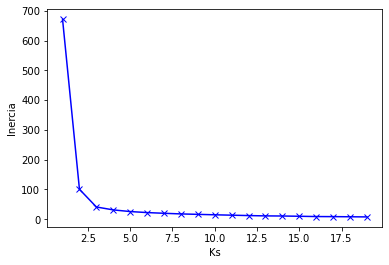

In [23]:
#verifico graficamente cuantos clusters puedo hacer

plt.plot(range(1,20), inercias, 'bx-') 
plt.xlabel('Ks') 
plt.ylabel('Inercia') 
plt.show()

In [24]:
#aplicacion del algoritmo kmeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [25]:
X.size

672

In [26]:
df["Año/Trimestre"][45]

Timestamp('2004-04-01 00:00:00')

In [27]:
#centroides de los 2 clusters
centroides = kmeans.cluster_centers_
centroides

array([[ 0.75620183,  0.73227995,  0.79475077,  0.7347854 ,  0.73329805,
         0.78045238],
       [-1.12590051, -1.09028348, -1.18329559, -1.09401382, -1.09179932,
        -1.16200688]])

In [28]:
#ubico los centroides en un datframe para visualizar mejor las clases
df_centroides  = pd.DataFrame(data = centroides, columns = [df.drop(["Año/Trimestre"],axis=1).columns])
df_centroides

Consumo privado Consumo público  \
0        0.756202        0.732280   
1       -1.125901       -1.090283   

  Exportaciones FOB (bienes y servicios reales)  \
0                                      0.794751   
1                                     -1.183296   

  Formación bruta de capital fijo  \
0                        0.734785   
1                       -1.094014   

  Importaciones FOB (bienes y servicios reales) Producto Interno Bruto  
0                                      0.733298               0.780452  
1                                     -1.091799              -1.162007

In [29]:
#desescalo las variables para ver mejor las clases
df_centroides = scaler.inverse_transform(df_centroides)
df_centroides =  pd.DataFrame(data = df_centroides, columns = [df.drop(["Año/Trimestre"],axis=1).columns])
df_centroides

Consumo privado Consumo público  \
0   460706.029851    81713.358209   
1   180775.688889    34446.311111   

  Exportaciones FOB (bienes y servicios reales)  \
0                                 144234.686567   
1                                  29298.133333   

  Formación bruta de capital fijo  \
0                   125889.462687   
1                    47346.688889   

  Importaciones FOB (bienes y servicios reales) Producto Interno Bruto  
0                                 156833.208955          658719.343284  
1                                  29151.155556          264629.333333

In [30]:
#cuanto mas bajo el davies mejor esta hecho el cluster

from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, kmeans.labels_)

0.30770024647698846

In [31]:
#EL MEJOR VALOR ES 1 Y EL PEOR -1 
#VALORES CERCANOS A 0 SIGNIFICA QUE LOS CLUSTERS SE SOLAPAN
#Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.7461346322988307

In [32]:
df["Clusters"] = kmeans.labels_

In [33]:
df1 = df.copy()

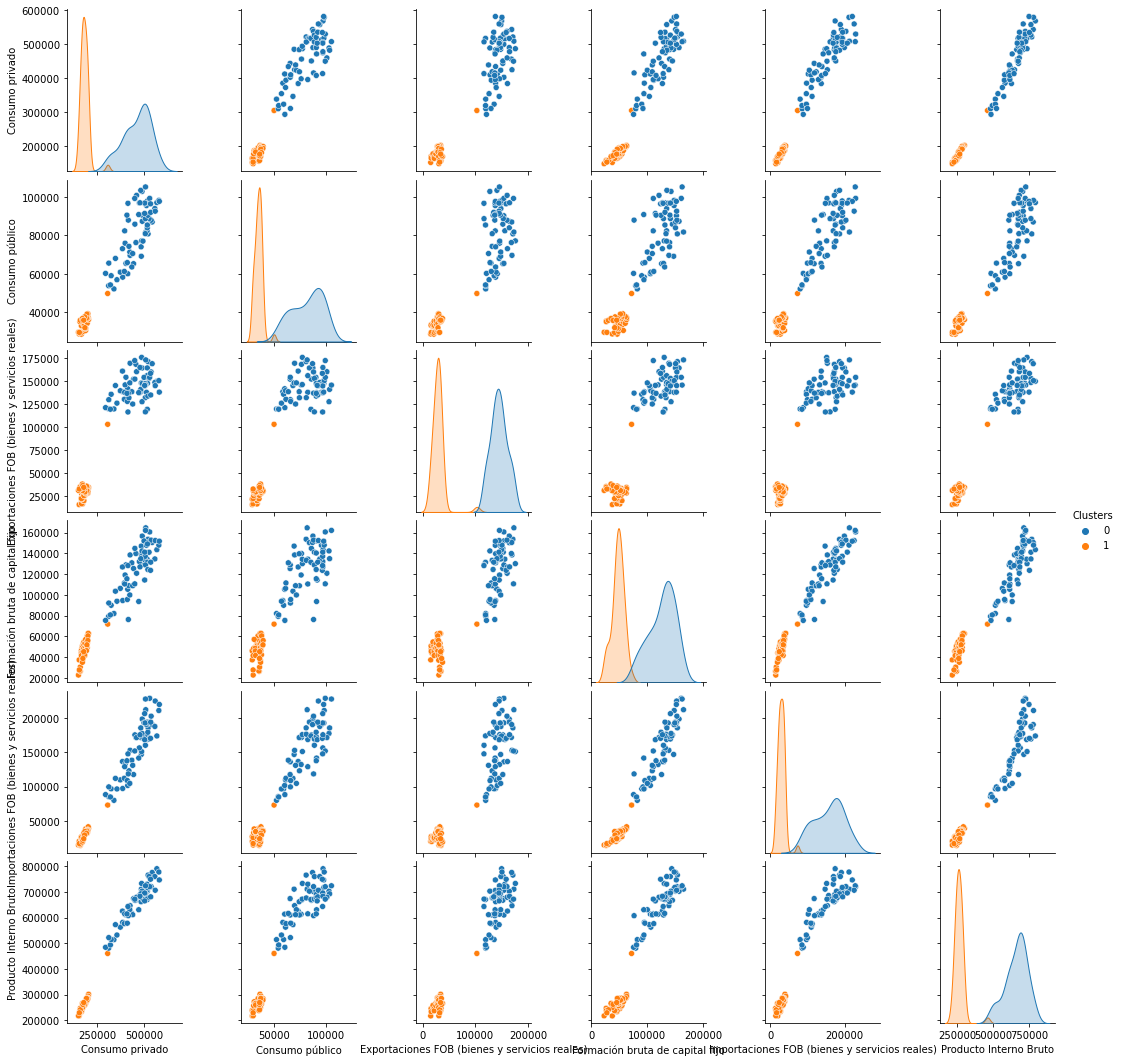

In [34]:
sns.pairplot(df1, hue="Clusters", palette="tab10")

## K MEANS con 3 clusters

In [35]:
#aplicacion del algoritmo kmeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 2])

In [36]:
#centroides de los 3 clusters
centroides1 = kmeans.cluster_centers_

In [37]:
#ubico los centroides en un datframe para visualizar mejor las clases
df_centroides1  = pd.DataFrame(data = centroides1, columns = [df.drop(["Año/Trimestre", "Clusters"],axis=1).columns])
df_centroides1

Consumo privado Consumo público  \
0        0.224451        0.157588   
1       -1.144919       -1.103639   
2        1.060493        1.058639   

  Exportaciones FOB (bienes y servicios reales)  \
0                                      0.627095   
1                                     -1.212035   
2                                      0.881549   

  Formación bruta de capital fijo  \
0                        0.155022   
1                       -1.106951   
2                        1.063697   

  Importaciones FOB (bienes y servicios reales) Producto Interno Bruto  
0                                      0.082975               0.368484  
1                                     -1.106068              -1.183934  
2                                      1.107372               1.012203

In [38]:
#desescalo las variables para ver mejor las clases
df_centroides1 = scaler.inverse_transform(df_centroides1)
df_centroides1 =  pd.DataFrame(data = df_centroides1, columns = [df.drop(["Año/Trimestre", "Clusters"],axis=1).columns])
df_centroides1

Consumo privado Consumo público  \
0   381617.230769    66809.076923   
1   177947.022727    34099.931818   
2   505964.119048    90177.285714   

  Exportaciones FOB (bienes y servicios reales)  \
0                                 134492.884615   
1                                  27628.227273   
2                                 149278.166667   

  Formación bruta de capital fijo  \
0                   100989.961538   
1                    46791.068182   
2                   140015.452381   

  Importaciones FOB (bienes y servicios reales) Producto Interno Bruto  
0                                 111337.230769          575138.384615  
1                                  28152.931818          260180.704545  
2                                 183003.095238          705737.309524

In [39]:
#validacion de la agrupacion
#cuanto mas bajo el davies mejor esta hecho el cluster

from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, kmeans.labels_)

0.5696183986146571

In [40]:
#EL MEJOR VALOR ES 1 Y EL PEOR -1 
#VALORES CERCANOS A 0 SIGNIFICA QUE LOS CLUSTERS SE SOLAPAN
#Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.6535283560514057

In [41]:
df["Clusters3"] = kmeans.labels_

In [42]:
df2 = df.drop(["Clusters"], axis=1).copy()

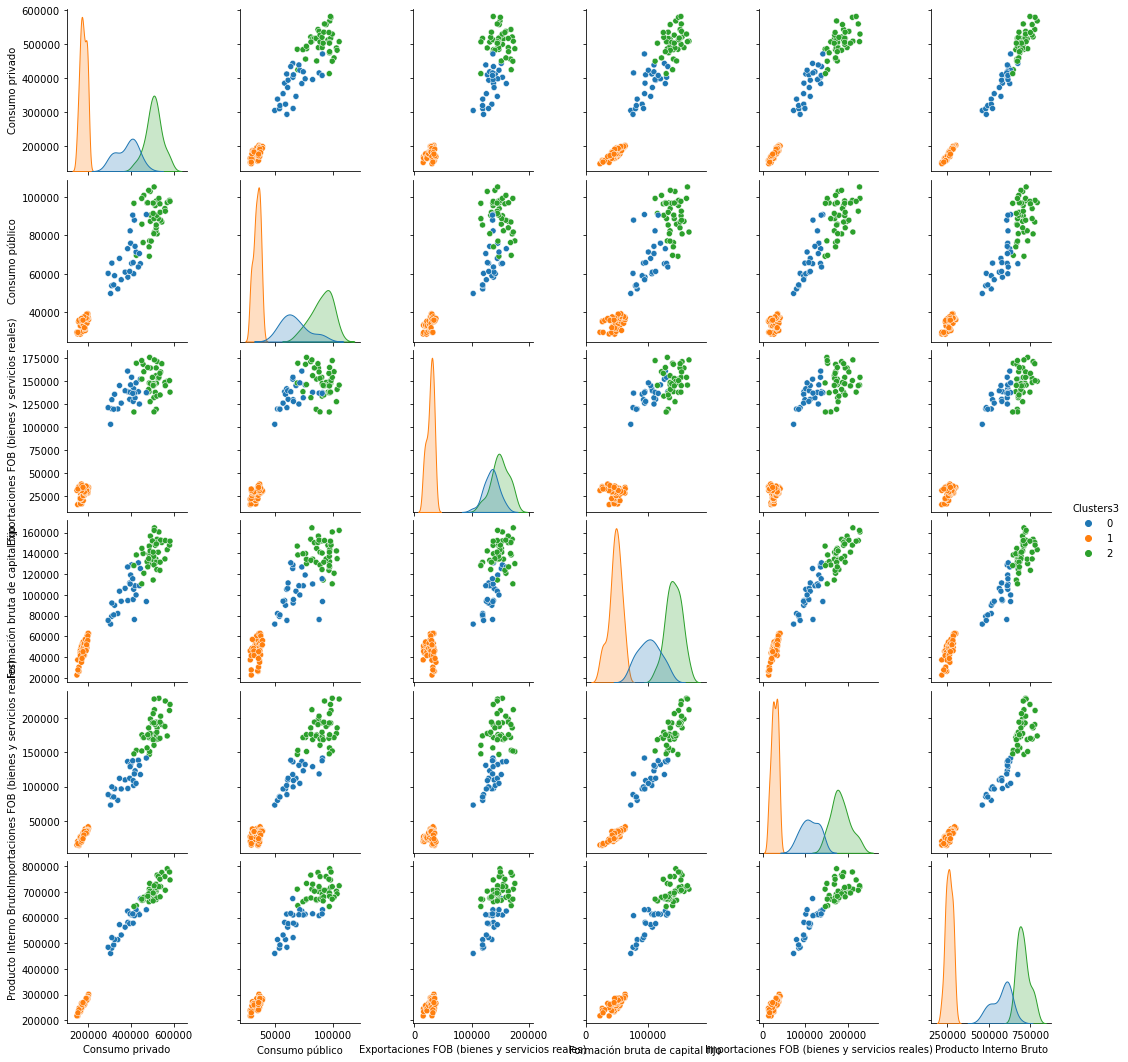

In [43]:
sns.pairplot(df2, hue="Clusters3", palette="tab10")

## Conclusion:

Vemos que el resultado del algoritmo K means es mejor cuando agrupa en 2 clusters que en 3.
Esto es evidente al validar dichos clusters, obteniendo los siguientes resultados:

    - Davis_Bouldin Score (2 clusters) = 0.31 <  0.57 = Davis_Bouldin Score (3 clusters) 
    
    El minimo valor de esta puntuacion es 0, los valores mas bajos indican una mejor agrupacion. Podemos decir entonces que en este caso la mejor puntuacion es la del primer cluster con dos grupos.
    
    - Silhouette_score (2 clusters) = 0.75 > 0.65 = Silhouette_score (3 clusters)
    
    Este coeficiente se mantiene en un intervalo entre -1 y 1, siendo el primero el peor resultado y el segundo el mejor. Valores cercanos a 0 indican que las agrupaciones se solapan, con lo cual, no sería tan clara la diferencia entre ellos. Resultados negativos indican que la muestra se asigno a agrupaciones incorrectas. En este caso en particular, la agrupacion realizada con 2 clusters arroja un resultado más cercano a 1, con lo cual sería el indicado.
    
    
Habiendo validado estos dos conceptos puedo agrupar mis datos en dos, ya que tenemos diferentes valoes del PBI para evidentes periodos de tiempo.
    

In [45]:
df.drop(["Clusters3"], axis=1, inplace=True)

Ya tenemos certeza de que nuestra serie puede dividirse en dos periodos grandes de tiempo. Teóricamente los años base de precios son distintos para una agrupacion que para otra, con lo cual solo se trabajará con el periodo 2004-2020.
 
El tratamiento economico de las series necesitan de cierta normalizacion de ruidos para llegar a conclusiones certeras. Un requisito importantisimo para el analisis de series de tiempo es que éstas sean estacionarias, es decir:

    - La media permanezca constante a lo largo del tiempo
    
    - Varianza finita y constante
    
    - Autocorrelacion entre dos periodos no se vea afectada por el paso del tiempo
    



## Test Dickey Fuller  del segundo cluster : 2004/04-2020/10

## MODELIZACION Redes Neuronales solo con PBI

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [47]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    #n_out=1-> CUANTOS DIAS HACIA ADELANTE QUIERO PREDECIR, cuanto mas hacia adelante itero mas complejo es para el modelo
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

## Periodo 2004-2020

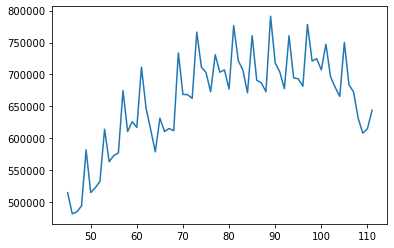

In [48]:
plt.plot(df["Producto Interno Bruto"][45:112])

Mi variable a predecir

In [49]:
PBI_processed = df["Producto Interno Bruto"][45:].values
len(PBI_processed)

67

In [50]:
PBI_processed #datos reales

array([514396, 481152, 484544, 493603, 581668, 514698, 522255, 532348,
       614076, 562979, 572794, 576847, 674621, 610426, 625877, 616720,
       711406, 647088, 613491, 578553, 631198, 610520, 615221, 611607,
       733731, 668567, 668190, 662326, 766333, 711417, 703050, 672686,
       730838, 703462, 706958, 677086, 776487, 721459, 706597, 671066,
       760577, 690880, 686701, 672750, 791236, 718281, 703682, 677652,
       760703, 694382, 693174, 681445, 778402, 721120, 724593, 707231,
       747420, 696471, 679900, 665471, 750204, 683793, 672442, 630971,
       607869, 614795, 643710], dtype=int64)

In [51]:
PBI_training = PBI_processed.reshape(-1,1)

In [52]:
scaler2 = StandardScaler()
PBI_training_escalado = scaler2.fit_transform(PBI_training)

In [53]:
PBI_training_escalado.shape

(67, 1)

In [54]:
serie_RNN = series_to_supervised(PBI_training_escalado, 4,1) 
serie_RNN
#4 por 4 trimestres que representan un año en total

var1(t-4)  var1(t-3)  var1(t-2)  var1(t-1)   var1(t)
4   -1.937947  -2.384342  -2.338795  -2.217152 -1.034631
5   -2.384342  -2.338795  -2.217152  -1.034631 -1.933892
6   -2.338795  -2.217152  -1.034631  -1.933892 -1.832418
7   -2.217152  -1.034631  -1.933892  -1.832418 -1.696891
8   -1.034631  -1.933892  -1.832418  -1.696891 -0.599463
..        ...        ...        ...        ...       ...
62   0.284410   0.090660   1.228439   0.336684  0.184265
63   0.090660   1.228439   0.336684   0.184265 -0.372600
64   1.228439   0.336684   0.184265  -0.372600 -0.682809
65   0.336684   0.184265  -0.372600  -0.682809 -0.589808
66   0.184265  -0.372600  -0.682809  -0.589808 -0.201543

[63 rows x 5 columns]

In [55]:
#TRAIN TEST SPLIT

values = serie_RNN.values
corte = 60
train = values[:corte, :]
test = values[corte:, :]

train_X, train_y = train[:, :-1], train[:, -1:]
test_X, test_y = test[:, :-1], test[:, -1:]

# reshape input to be 3D [samples, timesteps, features]
train_X= train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print("train:",train_X.shape, train_y.shape, "test:",test_X.shape, test_y.shape)

train: (60, 1, 4) (60, 1) test: (3, 1, 4) (3, 1)


In [56]:
test

array([[ 1.22843921,  0.33668447,  0.18426532, -0.37259967, -0.6828091 ],
       [ 0.33668447,  0.18426532, -0.37259967, -0.6828091 , -0.58980804],
       [ 0.18426532, -0.37259967, -0.6828091 , -0.58980804, -0.20154271]])

In [57]:

model = Sequential()
model.add(SimpleRNN(200, input_shape=(train_X.shape[1], train_X.shape[2]))) #SIEMPRE VAN A TENER MAS PARAMETROS QUE LAS CONVOLUCIONALES
model.add(Dense(60, activation="relu")) 
model.add(Dense(30, activation="relu")) 
model.add(Dense(15, activation="relu")) 
model.add(Dense(1)) #densidad de clases
#obtendremos un solo valor de salida, podemos pedirle 
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 200)               41000     
_________________________________________________________________
dense (Dense)                (None, 60)                12060     
_________________________________________________________________
dense_1 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_2 (Dense)              (None, 15)                465       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 16        
Total params: 55,371
Trainable params: 55,371
Non-trainable params: 0
_________________________________________________________________


In [58]:
history = model.fit(train_X, train_y, epochs=30, validation_data=(test_X, test_y), verbose=1)
#ESTA DANDO LOS XTEST COMO CONJUNTO DE VALIDACION

Epoch 1/30
2/2 [==============================] - 1s 316ms/step - loss: 0.7881 - val_loss: 0.3282
Epoch 2/30
2/2 [==============================] - 0s 70ms/step - loss: 0.6595 - val_loss: 0.3668
Epoch 3/30
2/2 [==============================] - 0s 78ms/step - loss: 0.5736 - val_loss: 0.4151
Epoch 4/30
2/2 [==============================] - 0s 84ms/step - loss: 0.5072 - val_loss: 0.4709
Epoch 5/30
2/2 [==============================] - 0s 71ms/step - loss: 0.4403 - val_loss: 0.5373
Epoch 6/30
2/2 [==============================] - 0s 86ms/step - loss: 0.3714 - val_loss: 0.6090
Epoch 7/30
2/2 [==============================] - 0s 78ms/step - loss: 0.3148 - val_loss: 0.6900
Epoch 8/30
2/2 [==============================] - ETA: 0s - loss: 0.267 - 0s 84ms/step - loss: 0.2742 - val_loss: 0.7706
Epoch 9/30
2/2 [==============================] - 0s 73ms/step - loss: 0.2472 - val_loss: 0.8515
Epoch 10/30
2/2 [==============================] - 0s 76ms/step - loss: 0.2260 - val_loss: 0.9049
Epoc

In [59]:
# prediccion
yhat = model.predict(test_X) 
#con los datos de mi xtest

#me devuelve las predicciones escaladas

In [60]:
#predicciones escaladas
yhat

array([[ 1.1847835 ],
       [-0.11261738],
       [-0.09497748]], dtype=float32)

In [61]:
#El reshape de aqui es para regresar a la forma inicial a test_X antes de haberse transformado para entrenar la red neuronal
test_X = test_X.reshape((test_X.shape[0], test_X.shape[-1]))
test_X.shape

(3, 4)

In [62]:
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -(test_X.shape[-1]-1):]), axis=1)
inv_yhat = scaler2.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
inv_yhat.shape

(3,)

In [63]:
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -(test_X.shape[-1]-1):]), axis=1)
inv_y = scaler2.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [64]:
test_y

array([[-0.6828091 ],
       [-0.58980804],
       [-0.20154271]])

## Validacion de la prediccion

In [65]:
# calculate RMSE
#mide la cantidad de error que hay entre dos conjuntos de datos. 
#En otras palabras, compara un valor predicho y un valor observado o conocido
#Cuanto más pequeño es un valor RMSE, más cercanos son los valores predichos y observados.
from sklearn.metrics import mean_squared_error
rmse1 = np.sqrt(mean_squared_error(test_y,yhat))
print('RMSE: %.3f' % rmse1)

RMSE: 1.115


In [66]:
#MAE: ERROR ABSOLUTO MEDIO
from sklearn.metrics import mean_absolute_error
mae_1 = mean_absolute_error(test_y, yhat)
print('MAE: %.3f' % mae_1)

MAE: 0.817


In [67]:
def SMAPE (forecast, actual):
    """Returns the Symmetric Mean Absolute Percentage Error between two Series"""
    masked_arr = ~((forecast==0)&(actual==0))
    diff = abs(forecast[masked_arr] - actual[masked_arr])
    avg = (abs(forecast[masked_arr]) + abs(actual[masked_arr]))/2
    print('SMAPE Error Score: ' + str(round(sum(diff/avg)/len(forecast) * 100, 2)) + ' %')
    return sum(diff/avg)/len(forecast) * 100




SMAPE(inv_yhat,inv_y )

SMAPE Error Score: 9.13 %


9.12500410590088

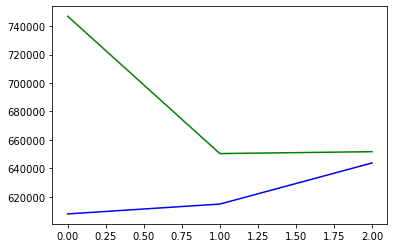

In [68]:
plt.plot(inv_y , color ="Blue") #Valor real
plt.plot(inv_yhat, color ="Green") #Predicción
plt.show()

## MODELIZACION Redes Neuronales con todas las variables

In [69]:
datos = df[['Consumo privado', 'Consumo público',
       'Exportaciones FOB (bienes y servicios reales)',
       'Formación bruta de capital fijo',
       'Importaciones FOB (bienes y servicios reales)','Producto Interno Bruto']].iloc[45:,:]
scaler3 = StandardScaler()
datos = scaler3.fit_transform(datos)
datos.shape

(67, 6)

In [70]:
scaler4 = StandardScaler()
scaler4.fit_transform(df[["Producto Interno Bruto"]])

array([[-1.39987586],
       [-1.27417717],
       [-1.27036215],
       [-1.25810872],
       [-1.31817812],
       [-1.19726054],
       [-1.21702079],
       [-1.19792595],
       [-1.29341988],
       [-1.2435091 ],
       [-1.27248653],
       [-1.26138156],
       [-1.3003303 ],
       [-1.18111815],
       [-1.17414365],
       [-1.15022334],
       [-1.20262819],
       [-1.07752098],
       [-1.06607591],
       [-1.04920403],
       [-1.12714589],
       [-0.98171159],
       [-1.02061598],
       [-1.05535046],
       [-1.16005665],
       [-1.05464069],
       [-1.09377181],
       [-1.06866855],
       [-1.16236833],
       [-1.06024493],
       [-1.10217571],
       [-1.09564975],
       [-1.18876792],
       [-1.06260591],
       [-1.16941184],
       [-1.23970886],
       [-1.39751488],
       [-1.25227774],
       [-1.29613575],
       [-1.28162485],
       [-1.33961422],
       [-1.15819842],
       [-1.17725876],
       [-1.14262779],
       [-0.19721123],
       [ 0

In [71]:
#ESTRUCTURA PARA ENTRENAR EL MODELO
series = series_to_supervised(datos, 4, 1) #por que quiero predecir solo un trimestre
series

var1(t-4)  var2(t-4)  var3(t-4)  var4(t-4)  var5(t-4)  var6(t-4)  \
4   -1.704742  -2.010411  -1.635699  -1.904875  -1.941581  -1.937947   
5   -2.101317  -1.898569  -1.625333  -2.023825  -1.804860  -2.384342   
6   -2.333326  -1.459473  -1.540883  -2.192465  -1.730080  -2.338795   
7   -1.970440  -1.867505  -1.653857  -1.962289  -1.817774  -2.217152   
8   -1.047799  -1.593969  -0.397272  -1.361852  -1.504830  -1.034631   
..        ...        ...        ...        ...        ...        ...   
62  -0.006517   1.307022   1.040759  -0.220389   0.375841   0.284410   
63   0.599553   0.667098   0.054560  -0.504116   0.296385   0.090660   
64   1.039841   1.006153   0.921380  -0.097923   0.347334   1.228439   
65   0.248804   1.044202   1.343763   0.045503   0.478900   0.336684   
66  -0.143379   1.198435   1.839900  -0.663946  -0.119668   0.184265   

    var1(t-3)  var2(t-3)  var3(t-3)  var4(t-3)  ...  var3(t-1)  var4(t-1)  \
4   -2.101317  -1.898569  -1.625333  -2.023825  ...  -1.653857  -1.962289   
5   -2.333326  -1.459473  -1.540883  -2.192465  ...  -0.397272  -1.361852   
6   -1.970440  -1.867505  -1.653857  -1.962289  ...  -0.581161  -1.559698   
7   -1.047799  -1.593969  -0.397272  -1.361852  ...  -0.969539  -1.466351   
8   -1.914070  -1.542015  -0.581161  -1.559698  ...  -1.217080  -1.390971   
..        ...        ...        ...        ...  ...        ...        ...   
62   0.599553   0.667098   0.054560  -0.504116  ...   1.343763   0.045503   
63   1.039841   1.006153   0.921380  -0.097923  ...   1.839900  -0.663946   
64   0.248804   1.044202   1.343763   0.045503  ...  -0.461649  -1.402905   
65  -0.143379   1.198435   1.839900  -0.663946  ...  -0.497833  -2.155274   
66   0.156188   0.626946  -0.461649  -1.402905  ...  -0.515991  -0.450868   

    var5(t-1)  var6(t-1)   var1(t)   var2(t)   var3(t)   var4(t)   var5(t)  \
4   -1.817774  -2.217152 -1.047799 -1.593969 -0.397272 -1.361852 -1.504830   
5   -1.504830  -1.034631 -1.914070 -1.542015 -0.581161 -1.559698 -1.516025   
6   -1.516025  -1.933892 -2.090675 -1.095458 -0.969539 -1.466351 -1.445466   
7   -1.445466  -1.832418 -1.479767 -1.684379 -1.217080 -1.390971 -1.521863   
8   -1.521863  -1.696891 -0.669711 -1.472495 -0.185123 -0.891085 -1.392217   
..        ...        ...       ...       ...       ...       ...       ...   
62   0.478900   0.336684 -0.143379  1.198435  1.839900 -0.663946 -0.119668   
63  -0.119668   0.184265  0.156188  0.626946 -0.461649 -1.402905 -0.380880   
64  -0.380880  -0.372600 -0.625368  0.429169 -0.497833 -2.155274 -0.966788   
65  -0.966788  -0.682809 -0.730584  0.605920 -0.515991 -0.450868 -0.480301   
66  -0.480301  -0.589808 -0.653812  1.025415 -1.853989  0.100400 -0.226367   

     var6(t)  
4  -1.034631  
5  -1.933892  
6  -1.832418  
7  -1.696891  
8  -0.599463  
..       ...  
62  0.184265  
63 -0.372600  
64 -0.682809  
65 -0.589808  
66 -0.201543  

[63 rows x 30 columns]

In [72]:
series_ = series.drop(["var1(t)","var2(t)","var3(t)","var4(t)","var5(t)"], axis = 1)

In [73]:
#TRAIN TEST SPLIT

values1 = series_.values
corte = 60
train1 = values1[:corte, :]
test1 = values1[corte:, :]

train_X1, train_y1 = train1[:, :-1], train1[:, -1:]
test_X1, test_y1 = test1[:, :-1], test1[:, -1:]

# reshape input to be 3D [samples, timesteps, features]
train_X1= train_X1.reshape((train_X1.shape[0], 1, train_X1.shape[1]))
test_X1 = test_X1.reshape((test_X1.shape[0], 1, test_X1.shape[1]))
print("train:",train_X1.shape, train_y1.shape, "test:",test_X1.shape, test_y1.shape)

train: (60, 1, 24) (60, 1) test: (3, 1, 24) (3, 1)


In [74]:
model = Sequential()
model.add(SimpleRNN(200, input_shape=(train_X1.shape[1], train_X1.shape[2]))) #SIEMPRE VAN A TENER MAS PARAMETROS QUE LAS CONVOLUCIONALES
model.add(Dense(60, activation="relu")) 
model.add(Dense(30, activation="relu")) 
model.add(Dense(15, activation="relu")) 
model.add(Dense(1)) #densidad de clases
#obtendremos un solo valor de salida, podemos pedirle 
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 200)               45000     
_________________________________________________________________
dense_4 (Dense)              (None, 60)                12060     
_________________________________________________________________
dense_5 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_6 (Dense)              (None, 15)                465       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 16        
Total params: 59,371
Trainable params: 59,371
Non-trainable params: 0
_________________________________________________________________


In [75]:
history = model.fit(train_X1, train_y1, epochs=30, validation_data=(test_X1, test_y1), verbose=1)
#ESTA DANDO LOS XTEST COMO CONJUNTO DE VALIDACION

Epoch 1/30
2/2 [==============================] - 1s 208ms/step - loss: 0.5772 - val_loss: 0.3902
Epoch 2/30
2/2 [==============================] - 0s 21ms/step - loss: 0.3511 - val_loss: 0.4935
Epoch 3/30
2/2 [==============================] - 0s 19ms/step - loss: 0.2820 - val_loss: 0.6090
Epoch 4/30
2/2 [==============================] - 0s 25ms/step - loss: 0.2700 - val_loss: 0.7193
Epoch 5/30
2/2 [==============================] - 0s 18ms/step - loss: 0.2382 - val_loss: 0.7904
Epoch 6/30
2/2 [==============================] - 0s 25ms/step - loss: 0.1931 - val_loss: 0.8447
Epoch 7/30
2/2 [==============================] - 0s 19ms/step - loss: 0.1524 - val_loss: 0.8871
Epoch 8/30
2/2 [==============================] - 0s 25ms/step - loss: 0.1400 - val_loss: 0.9293
Epoch 9/30
2/2 [==============================] - 0s 25ms/step - loss: 0.1286 - val_loss: 0.9807
Epoch 10/30
2/2 [==============================] - 0s 18ms/step - loss: 0.1098 - val_loss: 1.0515
Epoch 11/30
2/2 [===========

In [76]:
# prediccion
yhat1 = model.predict(test_X1) 
#con los datos de mi xtest

#me devuelve las predicciones escaladas

In [77]:
#El reshape de aqui es para regresar a la forma inicial a test_X antes de haberse transformado para entrenar la red neuronal
test_X_ = test_X1.reshape((test_X1.shape[0], test_X1.shape[-1]))
test_X_.shape

(3, 24)

In [78]:
# invert scaling for forecast
inv_yhat1 = np.concatenate((yhat1, test_X_[:, -(test_X_.shape[-1]-1):]), axis=1)
inv_yhat1 = scaler4.inverse_transform(inv_yhat1)
inv_yhat1 = inv_yhat1[:,0]
inv_yhat1.shape

(3,)

In [79]:
test_y1 = test_y1.reshape((len(test_y1), 1))
inv_y1 = np.concatenate((test_y1, test_X_[:, -(test_X_.shape[-1]-1):]), axis=1)
inv_y1 = scaler2.inverse_transform(inv_y1)
inv_y1 = inv_y1[:,0]



## Validacion de la prediccion

In [80]:
rmse3 = np.sqrt(mean_squared_error(test_y1, yhat1))
print('Test RMSE: %.3f' % rmse3)

Test RMSE: 1.139


In [81]:
SMAPE(inv_yhat1,inv_y1 )

SMAPE Error Score: 13.0 %


12.999467129980216

In [82]:
#MAE: ERROR ABSOLUTO MEDIO
from sklearn.metrics import mean_absolute_error
mae_2 = mean_absolute_error(test_y1, yhat1)
print('MAE: %.3f' % mae_2)

MAE: 1.033


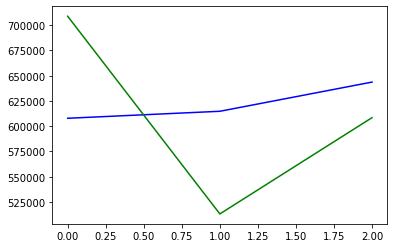

In [83]:
plt.plot(inv_y1 , color ="Blue") #Valor real
plt.plot(inv_yhat1, color ="Green") #Predicción
plt.show()